# Customer Chun Prediction Model

In [98]:
# Importing the Pandas Library
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing libraries for MOdel Selection, Modeling and Everluation 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score


import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


In [99]:
# Loading the Chan Dataset 
data = pd.read_csv(
    "/home/bravin/Documents/Projects/Moringa Phase 3 Projects/Telecom Churn Prediction/data.csv")

data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [100]:
# View the shape of the dataset
data.shape

(3333, 21)

* The dataset had 21 features with a total of 3333 raws of data.

In [101]:
# Data types and Infomation of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

$Inference$
* The DataFrame contains a mix of categorical and numerical columns. ```float64```,```bool``` & ```int64```
* Categorical columns represent features with discrete values, while numerical columns represent features with continuous or discrete numerical values.
* The ```'churn'``` column indicates whether a customer has churned (True) or not (False), represented as boolean values.

In [102]:
# Dropping Phone NUmber
data.drop("phone number", axis=1, inplace=True)

* The ```'phone number'``` was dropped. It has no usefulness in our final models and will also be excluded because of data protection laws.

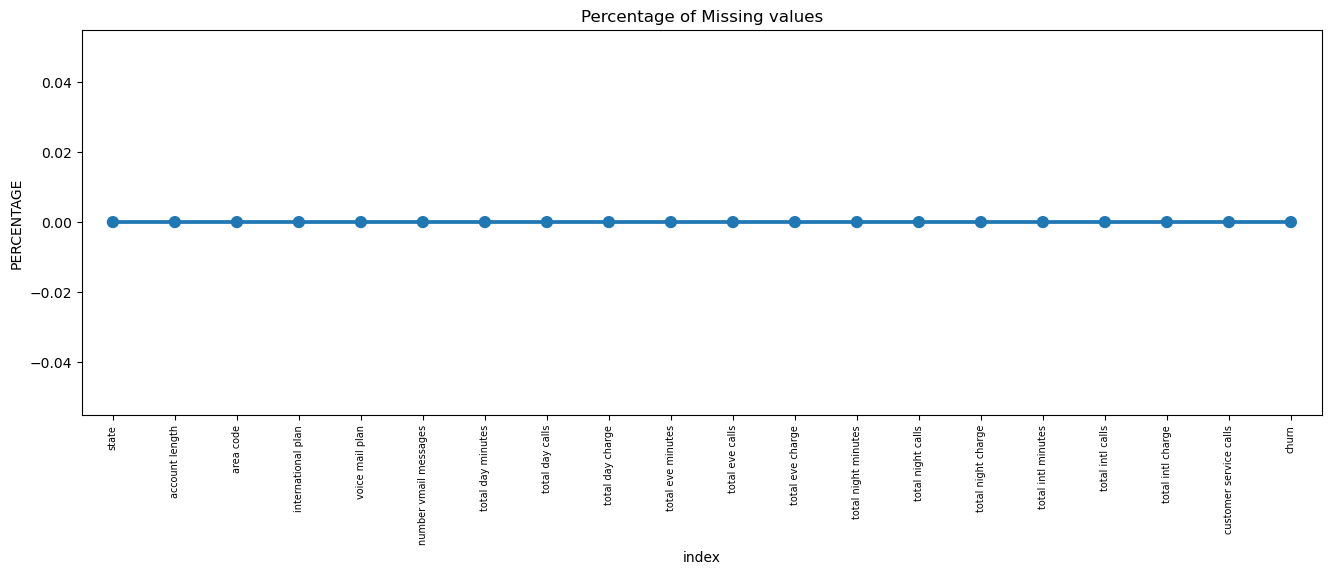

In [103]:
#Checking for Null Values
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

* Their are no ```NUll``` Valaues in the DataFrame

In [104]:
# Replacing cat with Values
column_covert = ['international plan', 'voice mail plan']

for i in column_covert:
    data[i].replace(to_replace='yes', value=1, inplace=True)
    data[i].replace(to_replace='no', value=0, inplace=True)

# Replacing the target variables with numbers
data['churn'].replace(to_replace=False, value=0, inplace=True)
data['churn'].replace(to_replace=True, value=1, inplace=True)
data.head()

state  account length  area code  international plan  voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [105]:
data.describe()
# data.describe()

account length    area code  international plan  voice mail plan  \
count     3333.000000  3333.000000         3333.000000      3333.000000   
mean       101.064806   437.182418            0.096910         0.276628   
std         39.822106    42.371290            0.295879         0.447398   
min          1.000000   408.000000            0.000000         0.000000   
25%         74.000000   408.000000            0.000000         0.000000   
50%        101.000000   415.000000            0.000000         0.000000   
75%        127.000000   510.000000            0.000000         1.000000   
max        243.000000   510.000000            1.000000         1.000000   

       number vmail messages  total day minutes  total day calls  \
count            3333.000000        3333.000000      3333.000000   
mean                8.099010         179.775098       100.435644   
std                13.688365          54.467389        20.069084   
min                 0.000000           0.000000         0.000000   
25%                 0.000000         143.700000        87.000000   
50%                 0.000000         179.400000       101.000000   
75%                20.000000         216.400000       114.000000   
max                51.000000         350.800000       165.000000   

       total day charge  total eve minutes  total eve calls  total eve charge  \
count       3333.000000        3333.000000      3333.000000       3333.000000   
mean          30.562307         200.980348       100.114311         17.083540   
std            9.259435          50.713844        19.922625          4.310668   
min            0.000000           0.000000         0.000000          0.000000   
25%           24.430000         166.600000        87.000000         14.160000   
50%           30.500000         201.400000       100.000000         17.120000   
75%           36.790000         235.300000       114.000000         20.000000   
max           59.640000         363.700000       170.000000         30.910000   

       total night minutes  total night calls  total night charge  \
count          3333.000000        3333.000000         3333.000000   
mean            200.872037         100.107711            9.039325   
std              50.573847          19.568609            2.275873   
min              23.200000          33.000000            1.040000   
25%             167.000000          87.000000            7.520000   
50%             201.200000         100.000000            9.050000   
75%             235.300000         113.000000           10.590000   
max             395.000000         175.000000           17.770000   

       total intl minutes  total intl calls  total intl charge  \
count         3333.000000       3333.000000        3333.000000   
mean            10.237294          4.479448           2.764581   
std              2.791840          2.461214           0.753773   
min              0.000000          0.000000           0.000000   
25%              8.500000          3.000000           2.300000   
50%             10.300000          4.000000           2.780000   
75%             12.100000          6.000000           3.270000   
max             20.000000         20.000000           5.400000   

       customer service calls        churn  
count             3333.000000  3333.000000  
mean                 1.562856     0.144914  
std                  1.315491     0.352067  
min                  0.000000     0.000000  
25%                  1.000000     0.000000  
50%                  1.000000     0.000000  
75%                  2.000000     0.000000  
max                  9.000000     1.000000

* These statistics provide insights into the distribution and variability of the numerical columns in the DataFrame.

# Exploratory Data Analysis (EDA)
### Univariate Analysis 

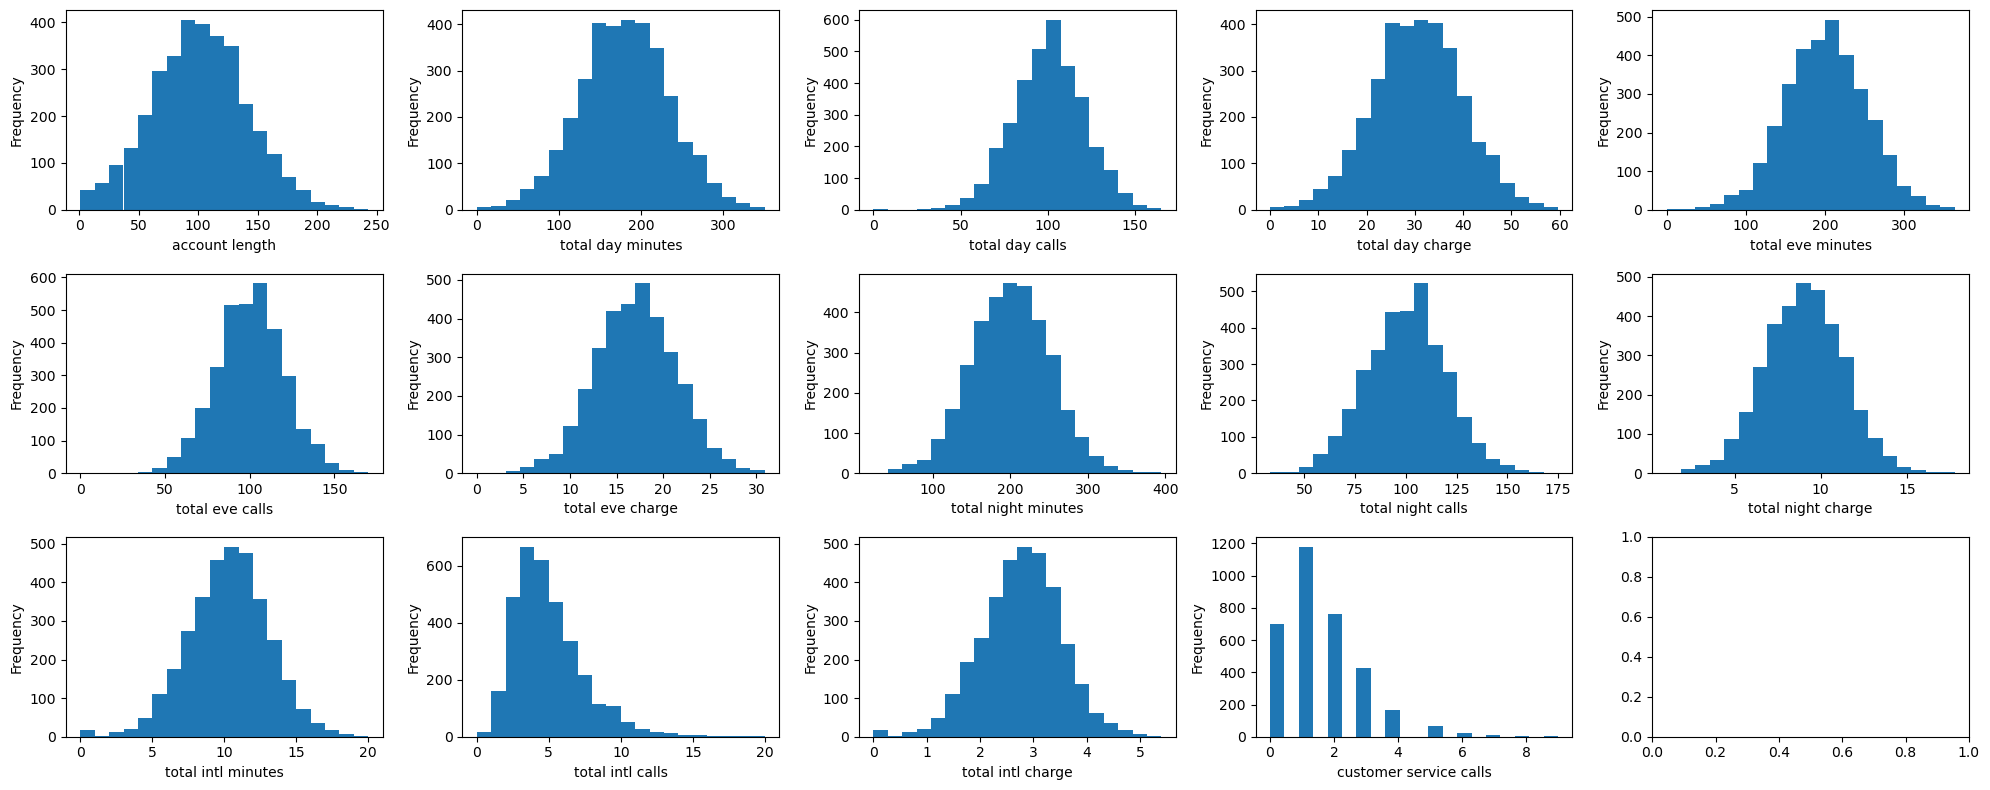

In [106]:
# Distribution Plots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 8))
variables = ['account length', 'total day minutes', 'total day calls', 'total day charge',
             'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
             'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
             'total intl charge', 'customer service calls']

for i, variable in enumerate(variables):
    ax = axes[i // 5, i % 5]
    ax.hist(data[variable], bins=20)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

$Inference$

* Most of the features in the DataFrame are Normally Distributed.
* ```total intl calls``` and ```customer service calls``` are left skewed 

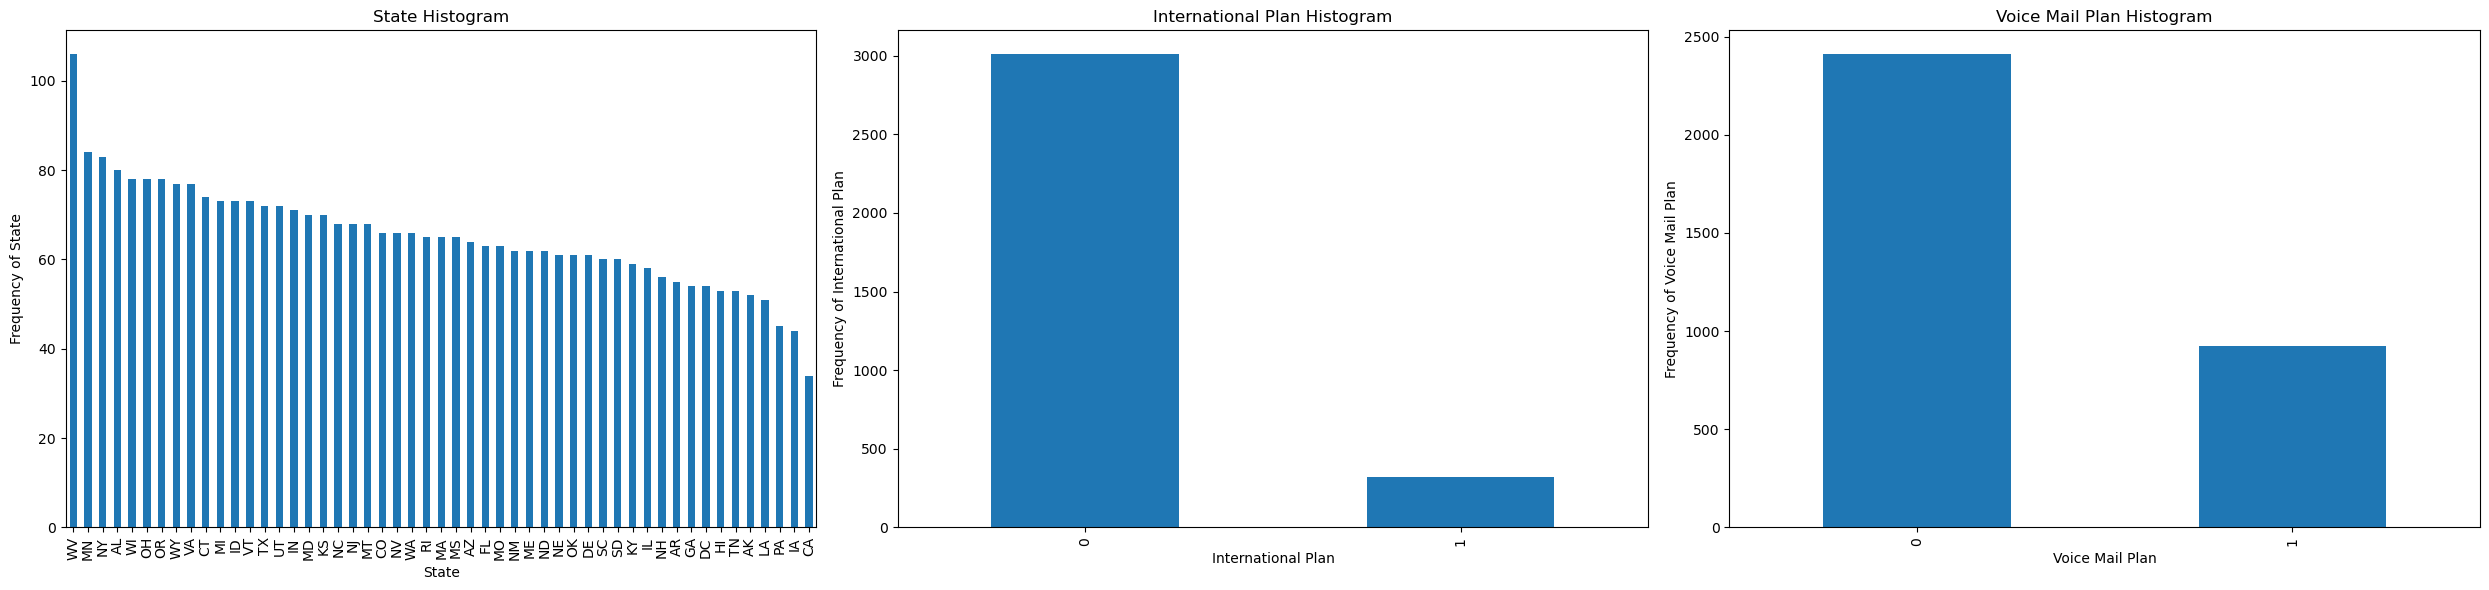

In [107]:

# Setting the plot figure size 
plt.figure(figsize=(25, 6))

# Plotting Distribution of Dataset Per State 
plt.subplot(1, 3, 1)
plt1 = data['state'].value_counts().plot(kind='bar')
plt.title('State Histogram')
plt1.set(xlabel='State', ylabel='Frequency of State')

# Value Counts for Internations Plan showing distribution
plt.subplot(1, 3, 2)
plt2 = data['international plan'].value_counts().plot(kind='bar')
plt.title('International Plan Histogram')
plt2.set(xlabel='International Plan', ylabel='Frequency of International Plan')

# Distribution of Voicemail Plan
plt.subplot(1, 3, 3)
plt3 = data['voice mail plan'].value_counts().plot(kind='bar')
plt.title('Voice Mail Plan Histogram')
plt3.set(xlabel='Voice Mail Plan', ylabel='Frequency of Voice Mail Plan')

# Show the plots 
plt.tight_layout()
plt.show()

$Inference$
* Majority of the DataFrame has subscribers on the ```international Plan``` ans ```Voice Mail Plan.```

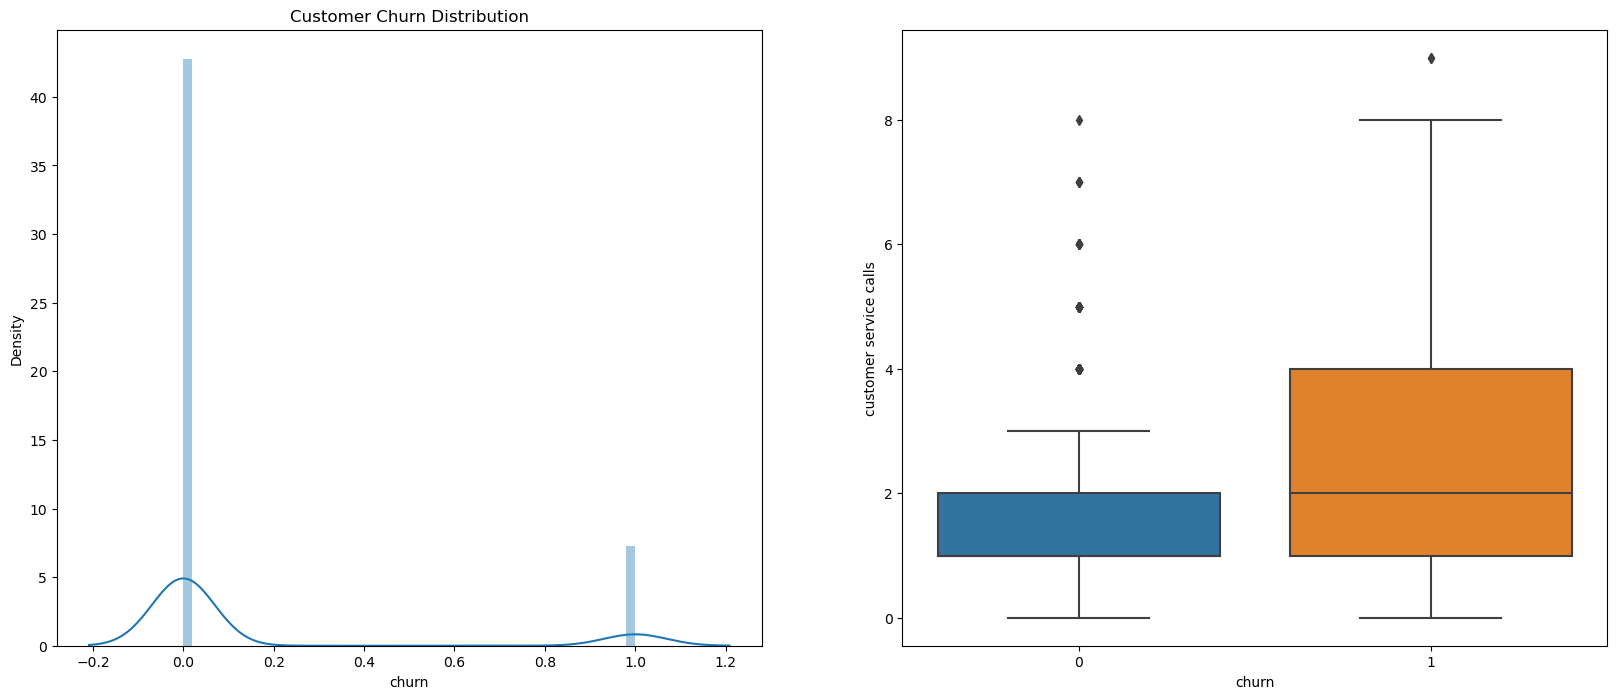

In [108]:
# Selecting Figure Size
plt.figure(figsize=(20, 8))

# Ploting Ditribution plot 
plt.subplot(1, 2, 1)
plt.title('Customer Churn Distribution')
sns.distplot(data.churn)

# Box PLot Distribution
plt.subplot(1, 2, 2)
sns.boxplot(x='churn', y='customer service calls', data=data)
plt.show()

$ Inference$

* The ```churn``` Distribution is normally Distributed between the ```False``` and ```True``` Values.
* The CUstomer service calls have outliers but they are not true outliers. WE will keep them in the analysis.

# Bivariate Analysis 

#### Churn Rate per State


Churn rate: 0.14491449144914492


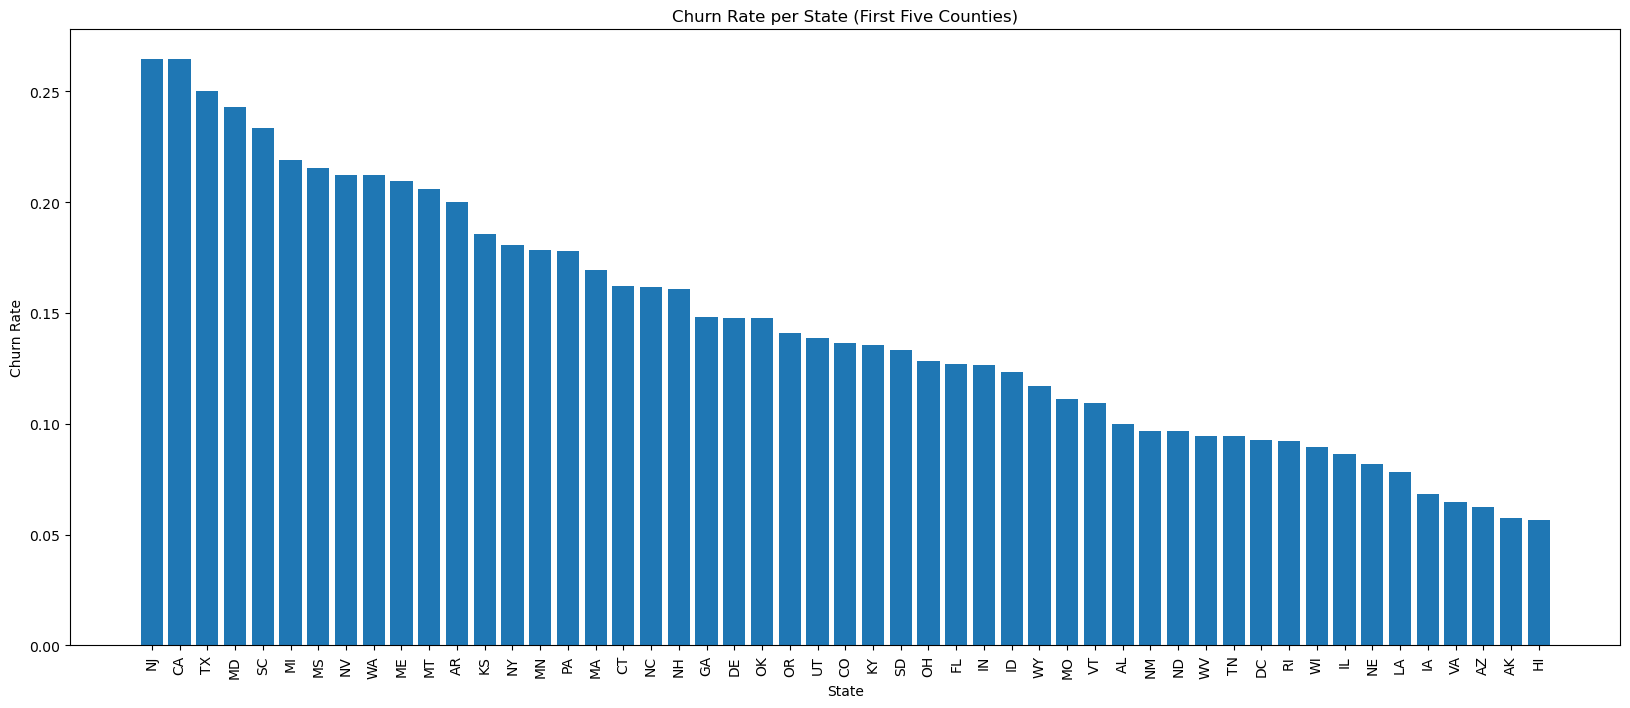

In [109]:

# Calculate churn rate
churn_rate = data['churn'].mean()
print("Churn rate:", churn_rate)

# Get churn rate per state
churn_by_state = data.groupby('state')['churn'].mean()

# Sort states by churn rate in descending order
sorted_states = churn_by_state.sort_values(ascending=False)

# Select the first five counties
counties = sorted_states.index[:]
churn_rates = sorted_states[:]

# Create a figure and axes object with the desired size
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the churn rates
ax.bar(counties, churn_rates)

# Set plot title and labels
ax.set_title("Churn Rate per State (First Five Counties)")
ax.set_xlabel("State")
ax.set_ylabel("Churn Rate")

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=90)

# Display the plot
plt.show()



* A churn rate of ```0.1449``` (or 14.49%) means that, on average, 14.49% of customers in the given dataset have discontinued or terminated their service within a specific period of time.

* In this context, the churn rate represents the percentage of customers who have churned (cancelled their subscriptions or switched to a competitor's service) out of the total number of customers in the dataset. 
* A higher churn rate indicates a higher rate of customer attrition, which can have negative implications for a business, such as loss of revenue, market share, and customer loyalty.



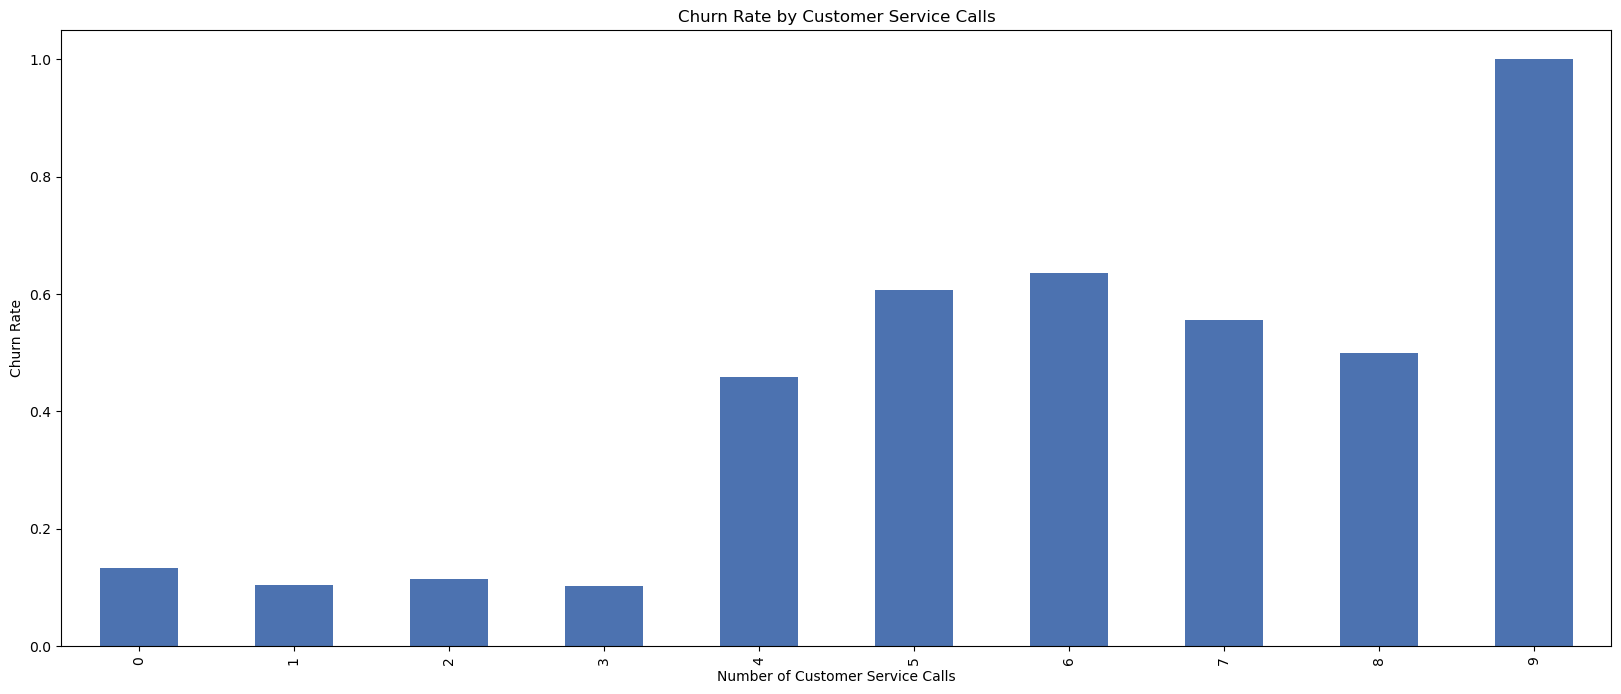

In [110]:
fig, ax = plt.subplots(figsize=(20, 8))

# Relationship between customer service calls and churn (Bar plot)
data.groupby('customer service calls')['churn'].mean().plot.bar(color='#4C72B0', title='Churn Rate by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')

# Display the plot
plt.show()

* Subscribers with high Number of Customer Service Calls had the highest chan rates.

Churn Rate: 14.49%


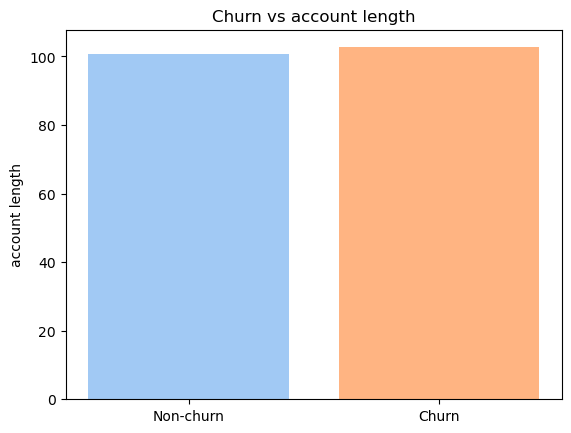

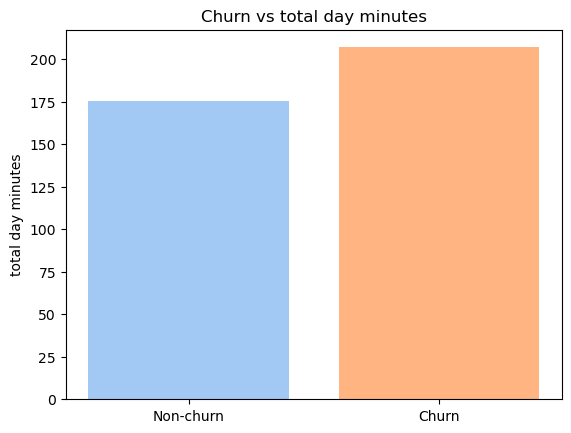

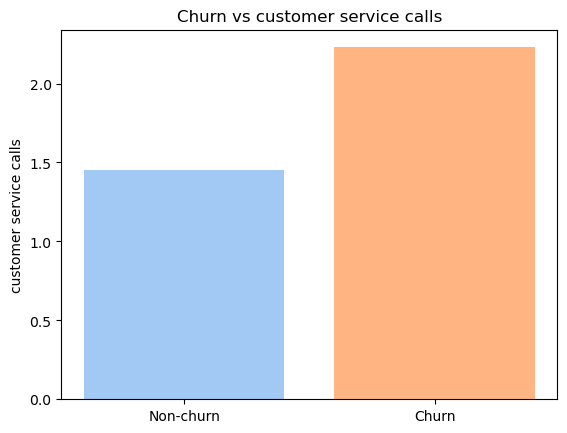

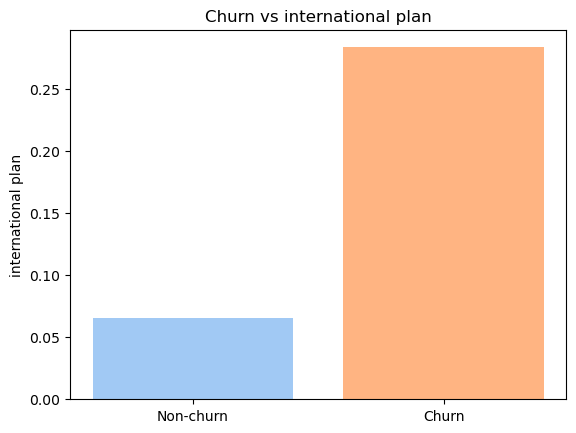

In [114]:
class ChurnAnalyzer:
    def __init__(self, data):
        self.data = data

    def calculate_churn_rate(self):
        churn_rate = self.data['churn'].mean() * 100
        return churn_rate

    def plot_relationship(self, variable):
        fig, ax = plt.subplots()
        ax.set_title(f'Churn vs {variable}')
        
        # Specify a color palette using seaborn
        colors = sns.color_palette('pastel')
        
        ax.bar(['Non-churn', 'Churn'], [
            self.data.loc[self.data['churn'] == 0, variable].mean(),
            self.data.loc[self.data['churn'] == 1, variable].mean()
        ], color=colors)

        ax.set_ylabel(variable)
        plt.show()

    def visualize_churn(self):
        churn_rate = self.calculate_churn_rate()
        print(f'Churn Rate: {churn_rate:.2f}%')

        self.plot_relationship('account length')
        self.plot_relationship('total day minutes')
        self.plot_relationship('customer service calls')
        self.plot_relationship('international plan')


# Create an instance of ChurnAnalyzer with the already imported data
analyzer = ChurnAnalyzer(data)

# Set the seaborn color palette
sns.set_palette('pastel')

# Visualizing Chan Relationships
analyzer.visualize_churn()

$Inference$

* The number of days the customer has been with the service provider does not affect the chun rate.
* The total number of minutes the customer used during the day has a negligable relationship between Non-churn and Churn customers.
* The number of customer service calls made by the customer affects the churn rate. WE have high churned subscribers with high customer service calls.
* Most Churn customers are international clients. This might be because of high charges or Tarifs from the telcom provider.

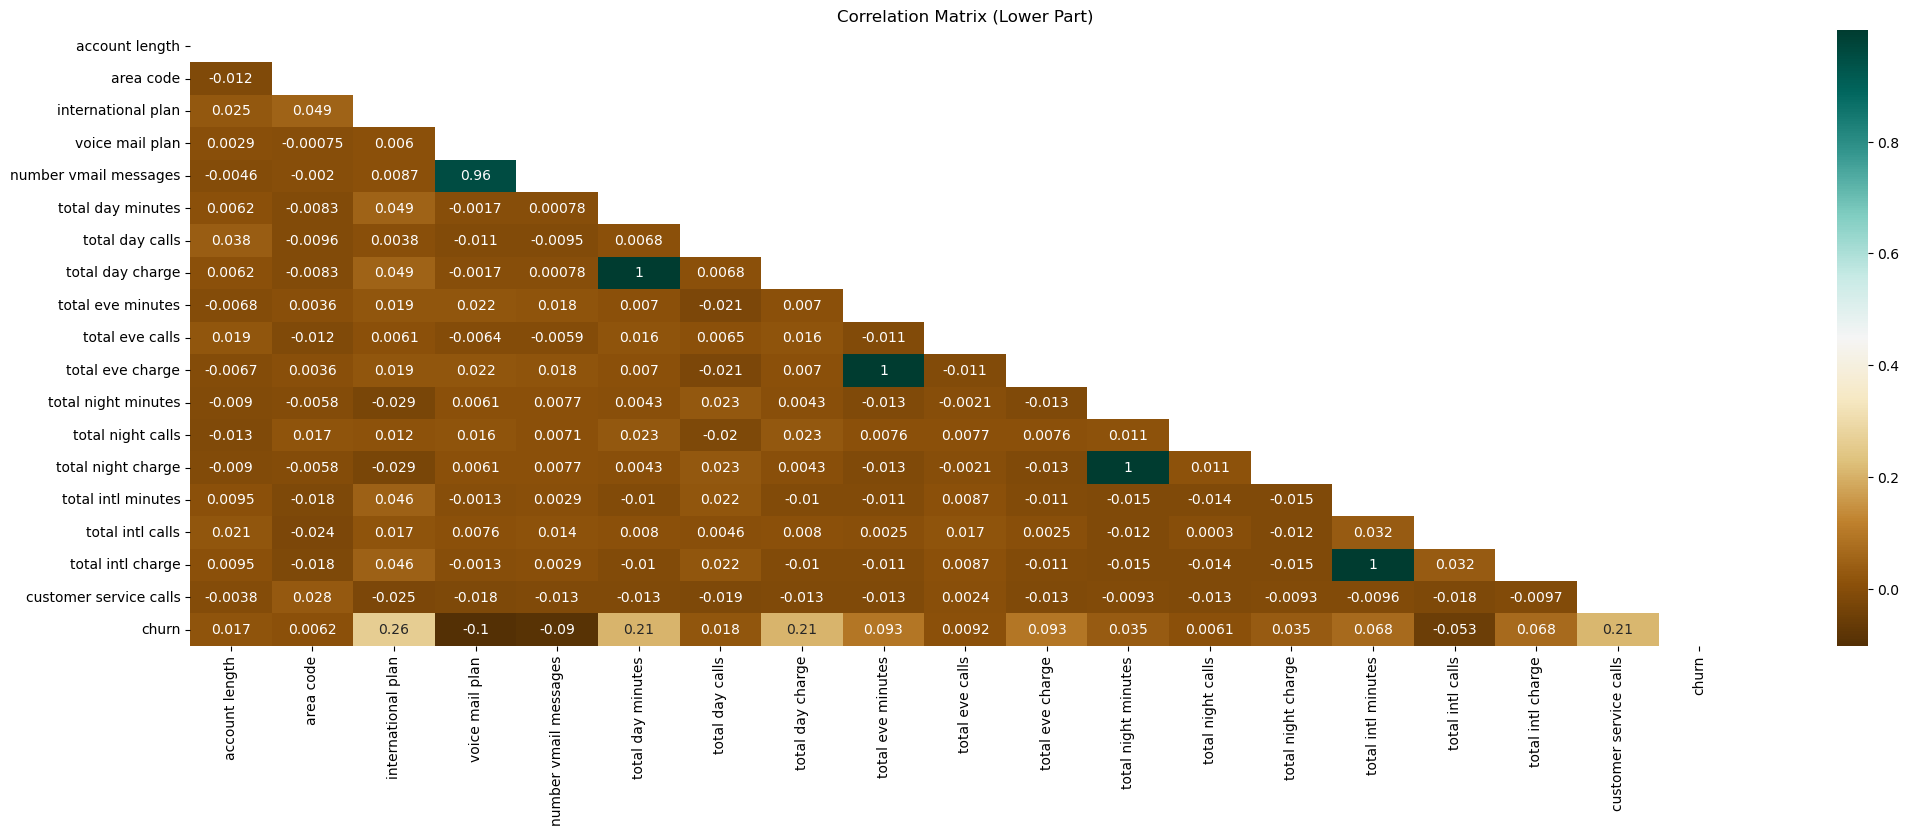

In [ ]:
# Correlation Analysis
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(25, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', mask=mask)
plt.title('Correlation Matrix (Lower Part)')
plt.show()

$Inference$
*   Total day minutes & total day charge - correlation 1 >> we can drop one of these
*   Total eve minutes & total eve charge - correlation 1 >> we can drop one of these
*   Total night minutes & total night charge - correlation 1 >> we can drop one of these
*   Total intl minutes & total intl charge - correlation 1 >> we can drop one of these

The following columns were dropped because of high Multicolinearity Between each other. 

    * voice mail plan
    * total day minutes 
    * total eve minutes 
    * total night minutes 
    * total intl minutes 


In [ ]:
# Replacing cat with NUmbers
column_covert = ['international plan', 'voice mail plan']

for i in column_covert:
    data[i].replace(to_replace='yes', value=1, inplace=True)
    data[i].replace(to_replace='no', value=0, inplace=True)

# Replacing the target variables with numbers
data['churn'].replace(to_replace=False, value=0, inplace=True)
data['churn'].replace(to_replace=True, value=1, inplace=True)
data.head()

state  account length  area code  international plan  voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [ ]:
data_model1 = data.drop(['voice mail plan', 'total day minutes',
                        'total eve minutes', 'total night minutes', 'total intl minutes'], axis=1)

In [ ]:
# Perform one-hot encoding on the 'state' column
data_encoded = pd.get_dummies(data_model1, columns=['state'])

# Print the updated DataFrame
data_encoded.head()

account length  area code  international plan  number vmail messages  \
0             128        415                   0                     25   
1             107        415                   0                     26   
2             137        415                   0                      0   
3              84        408                   1                      0   
4              75        415                   1                      0   

   total day calls  total day charge  total eve calls  total eve charge  \
0              110             45.07               99             16.78   
1              123             27.47              103             16.62   
2              114             41.38              110             10.30   
3               71             50.90               88              5.26   
4              113             28.34              122             12.61   

   total night calls  total night charge  ...  state_SD  state_TN  state_TX  \
0                 91               11.01  ...         0         0         0   
1                103               11.45  ...         0         0         0   
2                104                7.32  ...         0         0         0   
3                 89                8.86  ...         0         0         0   
4                121                8.41  ...         0         0         0   

   state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  
0         0         0         0         0         0         0         0  
1         0         0         0         0         0         0         0  
2         0         0         0         0         0         0         0  
3         0         0         0         0         0         0         0  
4         0         0         0         0         0         0         0  

[5 rows x 65 columns]

# Splitting the Dataset

In [ ]:
# Spliting data into Training and Target Variables

y = data_encoded.churn  # Target Variable
X = data_encoded.drop(['churn'], axis=1)  # Predictor Variables

In [ ]:
# Create Scaller Object

scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
X_scaled = pd.DataFrame(scaler.fit_transform(X))

X_scaled.head()

0         1    2         3         4         5         6         7   \
0  0.524793  0.068627  0.0  0.490196  0.666667  0.755701  0.582353  0.542866   
1  0.438017  0.068627  0.0  0.509804  0.745455  0.460597  0.605882  0.537690   
2  0.561983  0.068627  0.0  0.000000  0.690909  0.693830  0.647059  0.333225   
3  0.342975  0.000000  1.0  0.000000  0.430303  0.853454  0.517647  0.170171   
4  0.305785  0.068627  1.0  0.000000  0.684848  0.475184  0.717647  0.407959   

         8         9   ...   54   55   56   57   58   59   60   61   62   63  
0  0.408451  0.595935  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.492958  0.622236  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.500000  0.375374  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.394366  0.467424  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.619718  0.440526  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 64 columns]

# BASE MODEL - LOGISTICS REGRESSION

In [ ]:
    
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42)

    # Create a logistic regression model
lr = LogisticRegression()

    # Train the model on the training data
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
def evaluate_logistic_regression(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=random_state)

    # Create a logistic regression model
    lr = LogisticRegression()

    # Train the model on the training data
    lr.fit(X_train, y_train)

    # Predict the target variable on the test data
    y_pred = lr.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred)

    # Calculate recall
    recall = recall_score(y_test, y_pred)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate the ROC curve
    y_pred_prob = lr.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the area under the ROC curve
    auc = roc_auc_score(y_test, y_pred_prob)

    # Plot the ROC curve
    plt.figure(figsize=(25,8))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")

    # Create a heatmap of the confusion matrix
    plt.subplot(1,2,2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')

    # Add labels and title to the plot
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()

    # Return the evaluation metrics
    evaluation = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": cm,
        "AUC Score": auc
    }

    return evaluation

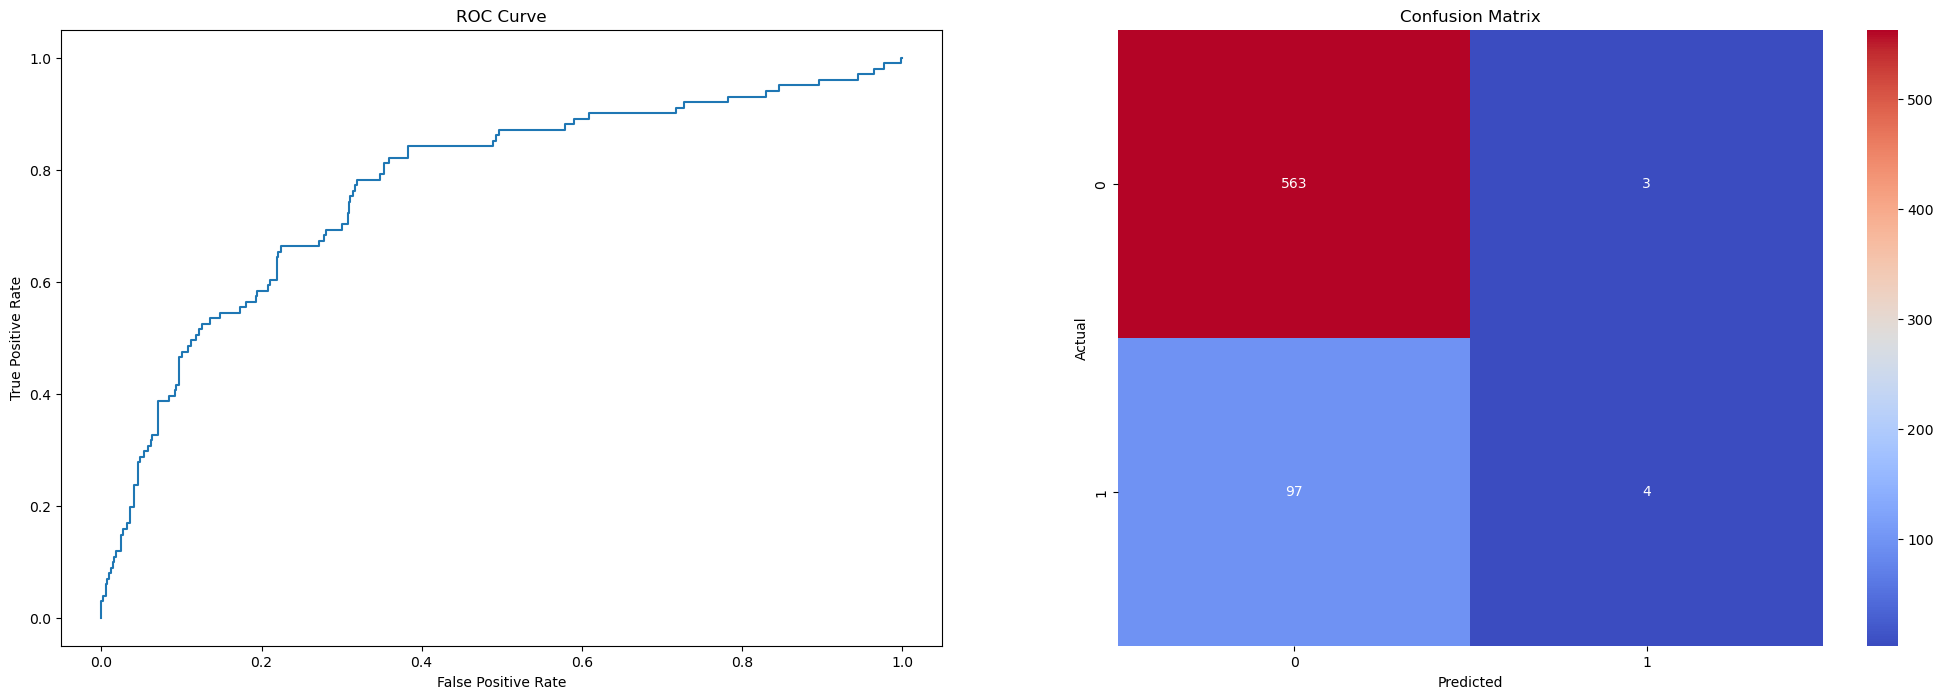

{'Accuracy': 0.8500749625187406,
 'Precision': 0.5714285714285714,
 'Recall': 0.039603960396039604,
 'F1 Score': 0.07407407407407407,
 'Confusion Matrix': array([[563,   3],
        [ 97,   4]]),
 'AUC Score': 0.7689360808872406}

In [ ]:
# Assuming you have X and y defined
evaluation = evaluate_logistic_regression(X, y)
evaluation

$Inferences$
* Accuracy: ```85.01%``` - This represents the overall accuracy of the model in correctly predicting the target variable on the test data.
* Precision: ```57.14%``` - This indicates the proportion of true positive predictions out of the total positive predictions. It measures the model's ability to avoid false positive predictions.
* Recall: ```3.96%``` - This represents the proportion of true positive predictions out of the actual positive instances in the data. It measures the model's ability to identify positive instances correctly.
* F1 Score: ```7.41%``` - This is the harmonic mean of precision and recall. It provides a single metric to evaluate the balance between precision and recall.
* Confusion Matrix: ```[[563, 3], [97, 4]]``` - This matrix shows the counts of true negatives ```(563)```, false positives ```(3)```, false negatives ```(97)```, and true positives ```(4)```. It provides a detailed breakdown of the model's predictions.
* AUC Score: ```76.89%``` - This represents the area under the Receiver Operating Characteristic (ROC) curve. It measures the model's ability to distinguish between positive and negative instances.


$Inferences$
* True Negatives ```(TN)```: The model predicted "not churn" ```(0)``` correctly, and the actual value is also "not churn" ```(0)```. In this case, there are ```563``` instances.
* False Positives ```(FP)```: The model predicted "churn" ```(1)```, but the actual value is "not churn" ```(0)```. In this case, there are ```3``` instances.
* False Negatives ```(FN)```: The model predicted "not churn" ```(0)```, but the actual value is "churn" ```(1)```. In this case, there are ```97``` instances.
* True Positives ```(TP)```: The model predicted "churn" ```(1)``` correctly, and the actual value is also "churn" ```(1)```. In this case, there are 4 instances.*

The confusion matrix helps us to evaluate the performance of the model in terms of different types of errors it makes. In Our case, you have a relatively large number of false negatives ```(97)```, indicating that the model struggles to correctly identify instances that are actually churned. This could be further supported by the low recall score ```(3.96%)``` in the evaluation results. 

# MODEL 2 - Logistic Regression

In [ ]:
# Selecting data for the Second Model
data_model2 = data.drop(["number vmail messages","total day charge","total eve charge","total night charge","total intl charge"],axis=1)

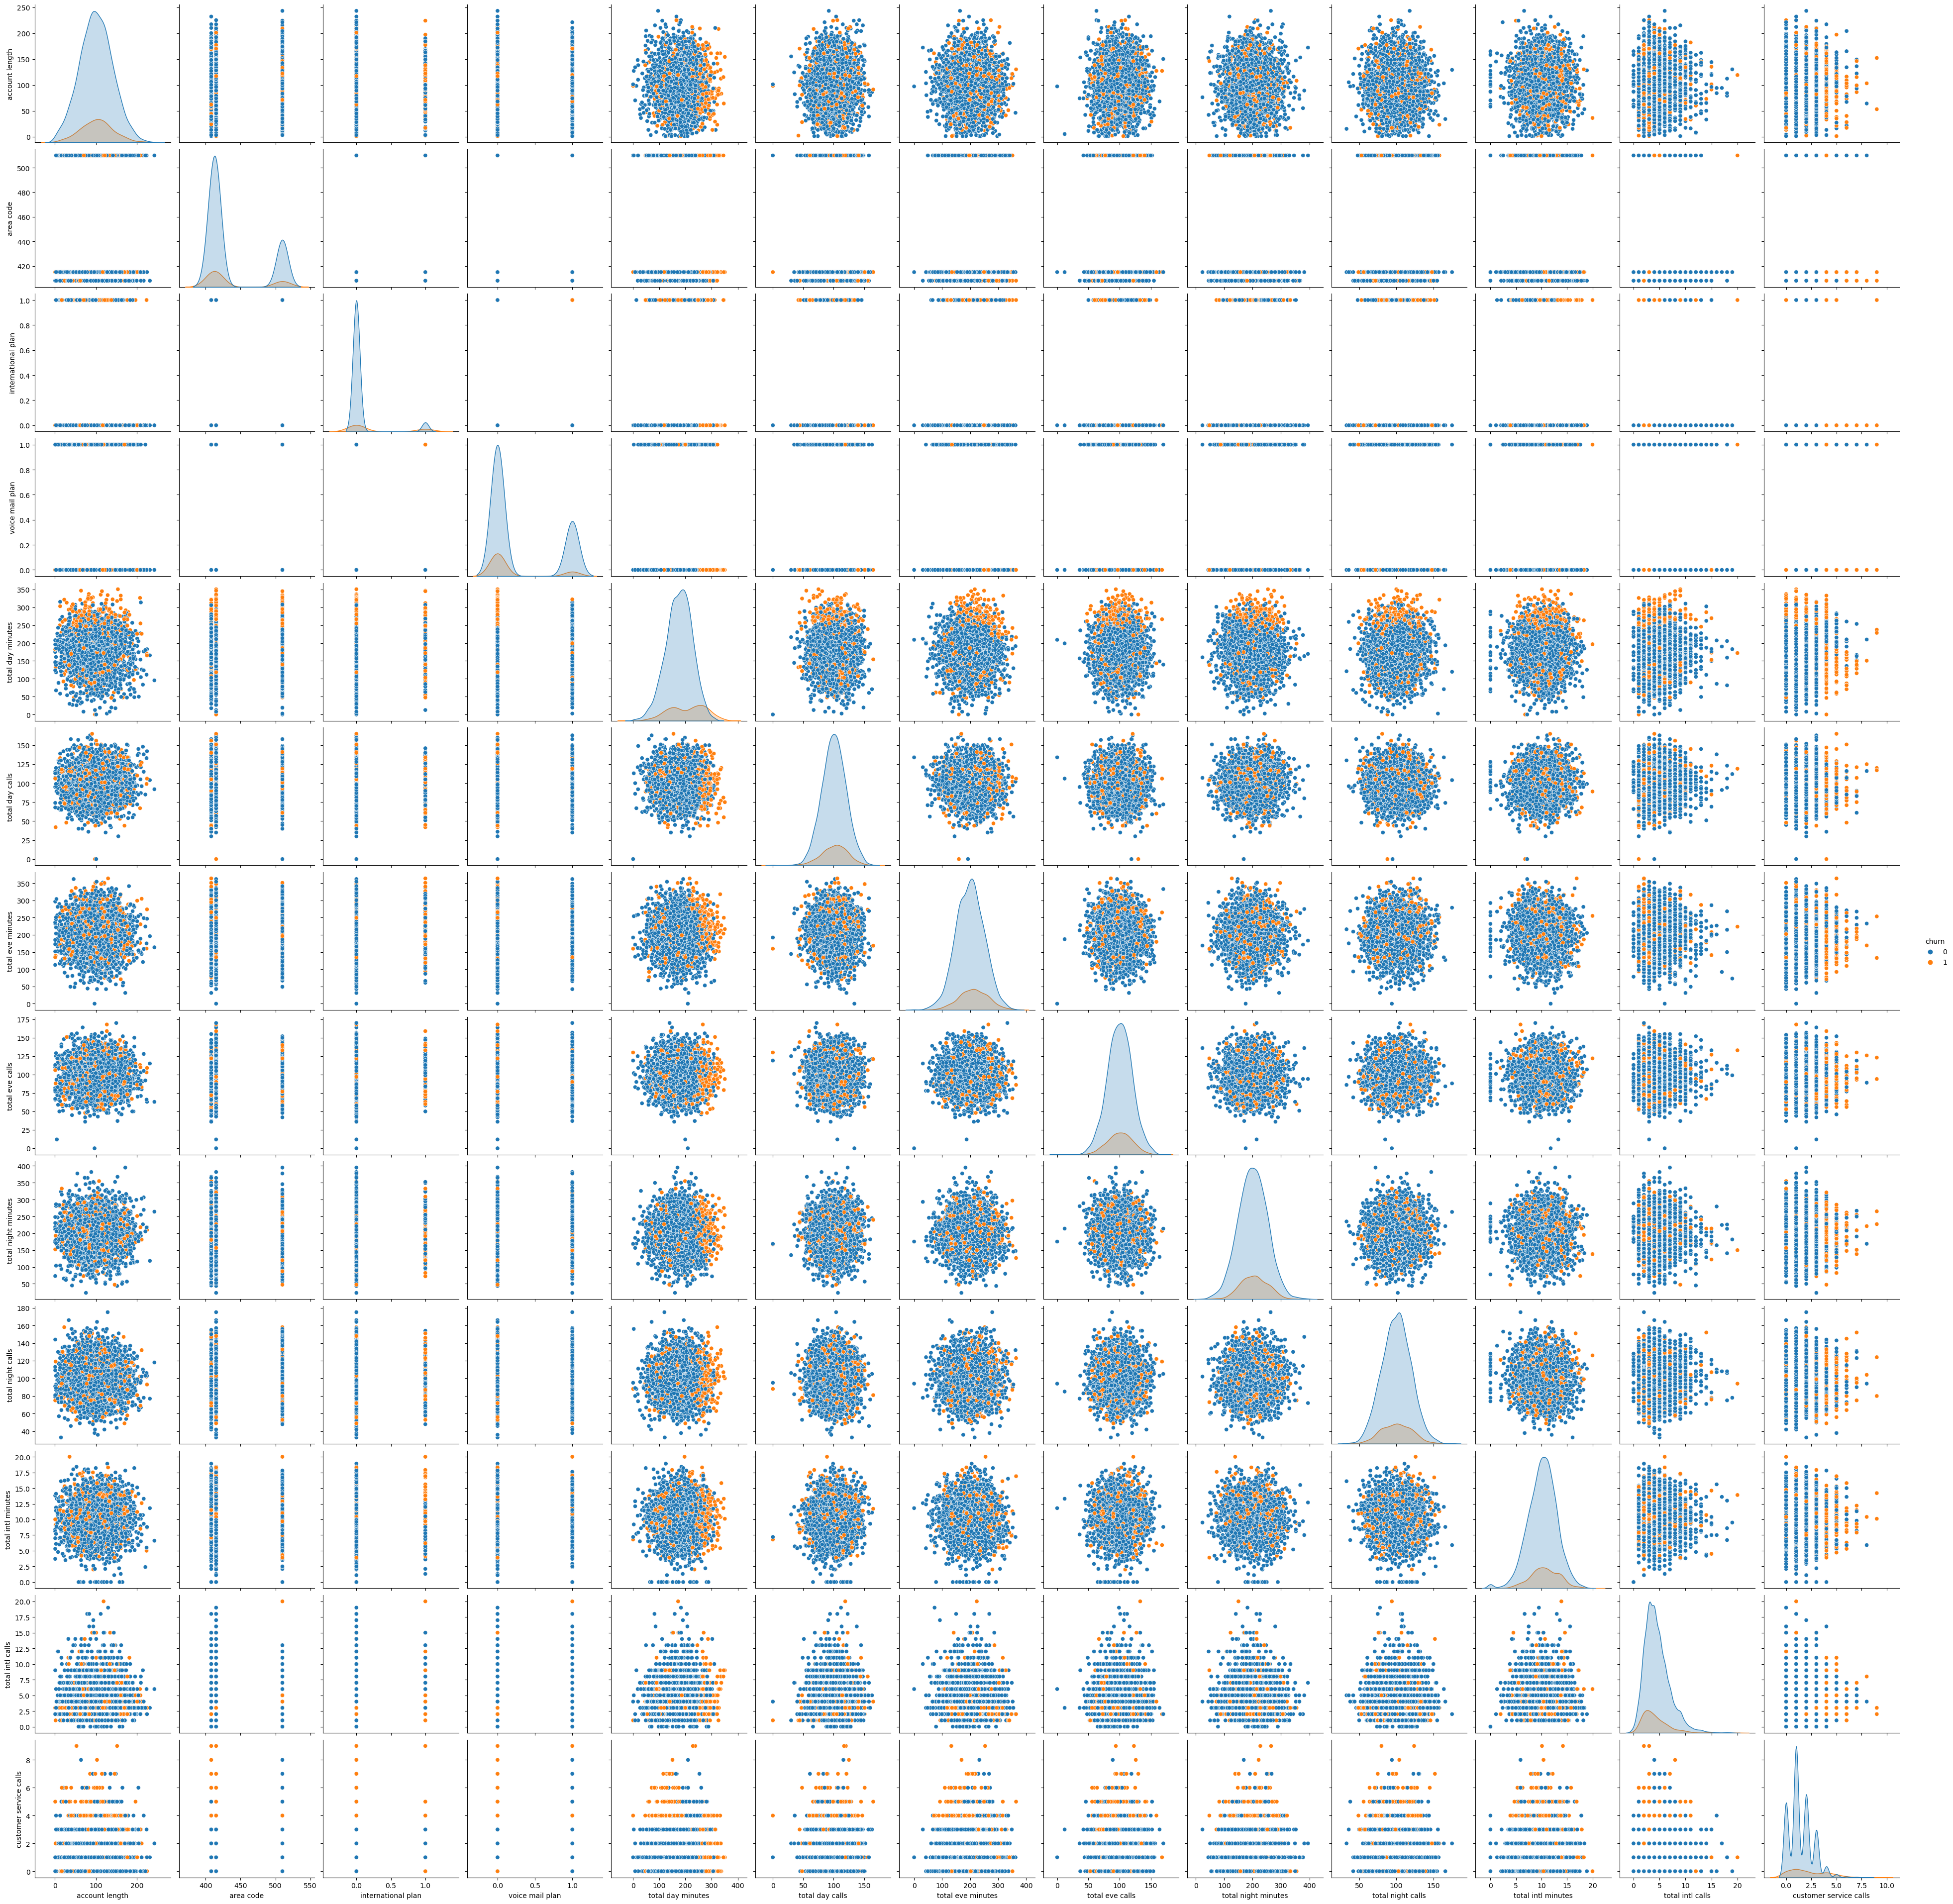

In [ ]:
sns.pairplot(data_model2,hue="churn",height=3.0)

In [ ]:
# Perform one-hot encoding on the 'state' column
data_encoded = pd.get_dummies(data_model2, columns=['state'])

# Print the updated DataFrame
data_encoded.head()

account length  area code  international plan  voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   total day minutes  total day calls  total eve minutes  total eve calls  \
0              265.1              110              197.4               99   
1              161.6              123              195.5              103   
2              243.4              114              121.2              110   
3              299.4               71               61.9               88   
4              166.7              113              148.3              122   

   total night minutes  total night calls  ...  state_SD  state_TN  state_TX  \
0                244.7                 91  ...         0         0         0   
1                254.4                103  ...         0         0         0   
2                162.6                104  ...         0         0         0   
3                196.9                 89  ...         0         0         0   
4                186.9                121  ...         0         0         0   

   state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  
0         0         0         0         0         0         0         0  
1         0         0         0         0         0         0         0  
2         0         0         0         0         0         0         0  
3         0         0         0         0         0         0         0  
4         0         0         0         0         0         0         0  

[5 rows x 65 columns]

In [ ]:
# Spliting data into Training and Target Variables

y = data_encoded.churn  # Target Variable
X = data_encoded.drop(['churn'], axis=1)  # Predictor Variables

In [ ]:
# Create Scaller Object

scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
X_scaled = pd.DataFrame(scaler.fit_transform(X))

X_scaled.head()

0         1    2    3         4         5         6         7   \
0  0.524793  0.068627  0.0  1.0  0.755701  0.666667  0.542755  0.582353   
1  0.438017  0.068627  0.0  1.0  0.460661  0.745455  0.537531  0.605882   
2  0.561983  0.068627  0.0  0.0  0.693843  0.690909  0.333242  0.647059   
3  0.342975  0.000000  1.0  0.0  0.853478  0.430303  0.170195  0.517647   
4  0.305785  0.068627  1.0  0.0  0.475200  0.684848  0.407754  0.717647   

         8         9   ...   54   55   56   57   58   59   60   61   62   63  
0  0.595750  0.408451  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.621840  0.492958  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.374933  0.500000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.467187  0.394366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.440290  0.619718  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 64 columns]

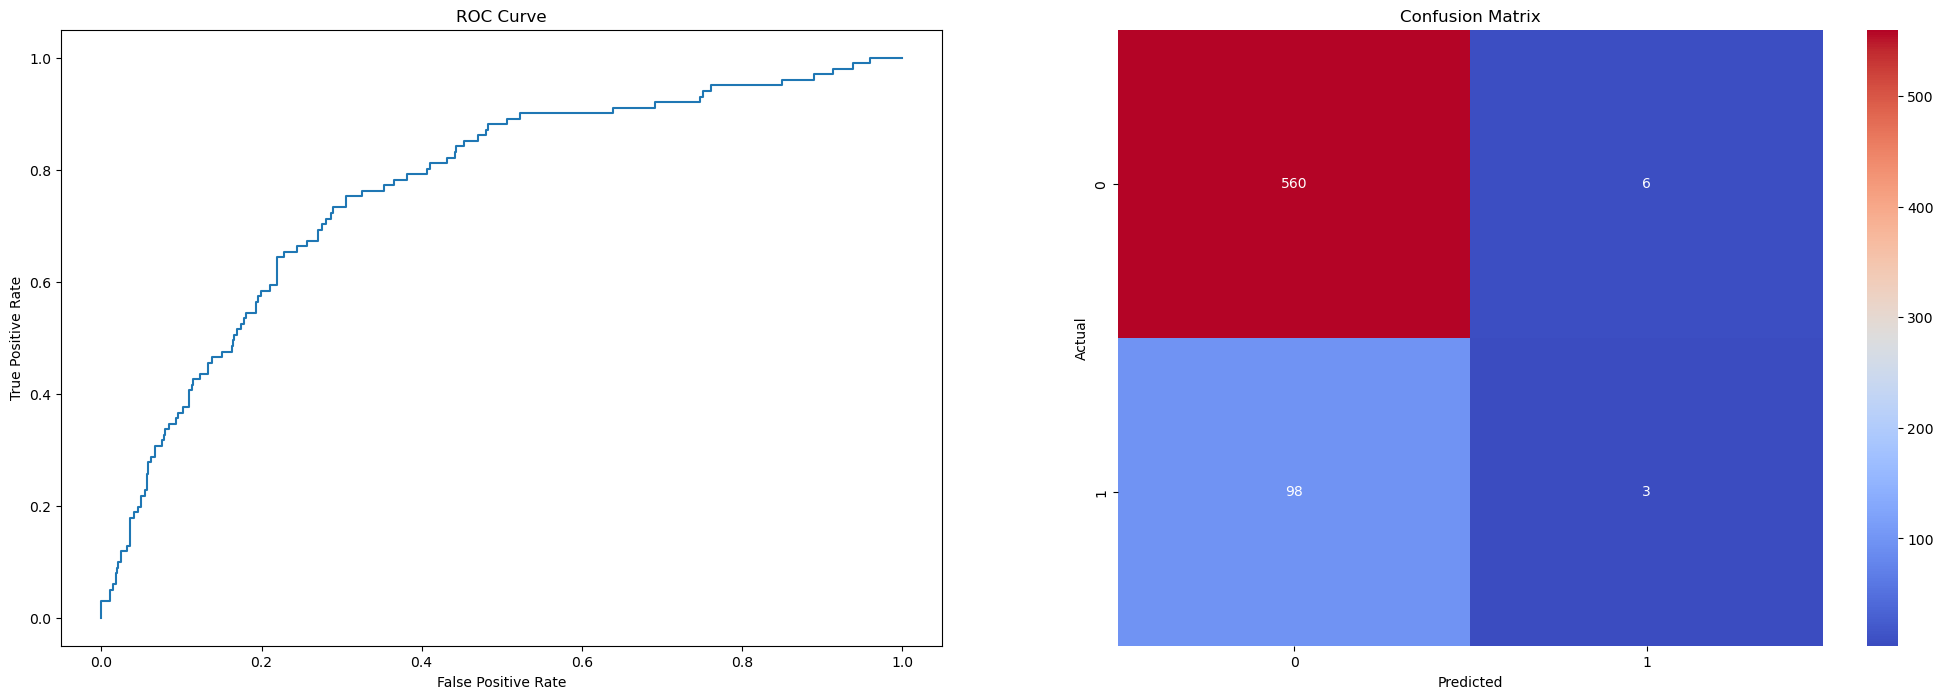

{'Accuracy': 0.8440779610194903,
 'Precision': 0.3333333333333333,
 'Recall': 0.0297029702970297,
 'F1 Score': 0.05454545454545454,
 'Confusion Matrix': array([[560,   6],
        [ 98,   3]]),
 'AUC Score': 0.7639156141762585}

In [ ]:
evaluation = evaluate_logistic_regression(X, y)
evaluation

$Infereces$

* Based on these metrics, ```Model 1``` performs better in terms of accuracy, precision, recall, ```F1 score```, and ```AUC``` score compared to ```Model 2```. ```Model 1``` has higher values for all these metrics, indicating better overall performance in predicting the target variable.

# Other Models 

* Decision Tree
* Random Forest
* K-Nearest Neighbors

In [ ]:
def models(X_train, y_train):
   
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
    tree.fit(X_train, y_train)
    tree_y_pred = tree.predict(X_test)
    tree_acc = accuracy_score(y_test, tree_y_pred)
    tree_f1 = f1_score(y_test, tree_y_pred)
    tree_prec = precision_score(y_test, tree_y_pred)
    tree_rec = recall_score(y_test, tree_y_pred)
    tree_auc = roc_auc_score(y_test, tree_y_pred)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
    forest.fit(X_train, y_train)
    forest_y_pred = forest.predict(X_test)
    forest_acc = accuracy_score(y_test, forest_y_pred)
    forest_f1 = f1_score(y_test, forest_y_pred)
    forest_prec = precision_score(y_test, forest_y_pred)
    forest_rec = recall_score(y_test, forest_y_pred)
    forest_auc = roc_auc_score(y_test, forest_y_pred)

    # K-Nearest Neighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn_y_pred = knn.predict(X_test)
    knn_acc = accuracy_score(y_test, knn_y_pred)
    knn_f1 = f1_score(y_test, knn_y_pred)
    knn_prec = precision_score(y_test, knn_y_pred)
    knn_rec = recall_score(y_test, knn_y_pred)
    knn_auc = roc_auc_score(y_test, knn_y_pred)
    

    print('Decision Treee:')
    print(f'Accuracy: {tree_acc:.3f}')
    print(f'F1 Score: {tree_f1:.3f}')
    print(f'Precision: {tree_prec:.3f}')
    print(f'Recall: {tree_rec:.3f}')
    print(f'ROC AUC Score: {tree_auc:.3f}')
    print('\n')
    print("............................................")

    print('Random Forest:')
    print(f'Accuracy: {forest_acc:.3f}')
    print(f'F1 Score: {forest_f1:.3f}')
    print(f'Precision: {forest_prec:.3f}')
    print(f'Recall: {forest_rec:.3f}')
    print(f'ROC AUC Score: {forest_auc:.3f}')
    print('\n')
    print("............................................")

    print('KNN:')
    print(f'Accuracy: {knn_acc:.3f}')
    print(f'F1 Score: {knn_f1:.3f}')
    print(f'Precision: {knn_prec:.3f}')
    print(f'Recall: {knn_rec:.3f}')
    print(f'ROC AUC Score: {knn_auc:.3f}')
    print('\n')
    print("............................................")

    return tree,forest


In [ ]:
model = models(X_train,y_train)

Decision Treee:
Accuracy: 0.925
F1 Score: 0.747
Precision: 0.763
Recall: 0.733
ROC AUC Score: 0.846


............................................
Random Forest:
Accuracy: 0.913
F1 Score: 0.633
Precision: 0.877
Recall: 0.495
ROC AUC Score: 0.741


............................................
KNN:
Accuracy: 0.855
F1 Score: 0.171
Precision: 0.625
Recall: 0.099
ROC AUC Score: 0.544


............................................


$Inference$
 
* Based on these metrics, the Decision Tree model has the highest accuracy, F1 score, precision, and recall among the three models. Additionally, it has the highest ROC AUC score of 0.846, indicating better class separation compared to the other models. Therefore, the Decision Tree model appears to be the best performer among the three models.

#### Hyperparameter Tuning for KNN using Gridsearch¶


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def knn_hyperparameter_tuning(X_train, y_train, X_test, y_test):
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],  # List of different values for the number of neighbors
        'weights': ['uniform', 'distance'],  # Different weight options
        'metric': ['euclidean', 'manhattan']  # Different distance metrics
    }

    # Create an instance of the KNN classifier
    knn = KNeighborsClassifier()

    # Create a GridSearchCV object
    grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and the corresponding model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Use the best model to make predictions
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    # Create a dictionary of evaluation metrics
    evaluation_metrics = {
        'Best Hyperparameters': best_params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion_mat,
        'AUC Score': auc_score
    }

    return evaluation_metrics


In [ ]:
knn_hyperparameter_tuning(X_train, y_train, X_test, y_test)

{'Best Hyperparameters': {'metric': 'manhattan',
  'n_neighbors': 9,
  'weights': 'uniform'},
 'Accuracy': 0.8545727136431784,
 'Precision': 0.8333333333333334,
 'Recall': 0.04950495049504951,
 'F1 Score': 0.09345794392523366,
 'Confusion Matrix': array([[565,   1],
        [ 96,   5]]),
 'AUC Score': 0.5238690830213764}

$Inference$

* The selected hyperparameters for the KNN model are: ```metric='manhattan'```, ```n_neighbors=9```, and ```weights='uniform'.```
* The accuracy of the model is ```0.8546```, indicating that it correctly predicts approximately ```85.46%``` of the churn cases in the dataset.
* The precision of the model is ```0.8333```, suggesting that when it predicts a customer will churn, it is correct around ```83.33%``` of the time.
* The recall of the model is ```0.0495```, indicating that it only captures around 4.95% of the actual churn cases.
* The F1 score of the model is ```0.0935```, which is a harmonic mean of precision and recall, reflecting a low overall performance.
* The AUC score of ```0.5239``` suggests that the model's ability to distinguish between churned and non-churned customers is slightly better than random chance.
* The confusion matrix reveals that the model correctly predicts 565 non-churned customers (true negatives) and ```5``` churned customers (true positives), but it incorrectly predicts 1 non-churned customer as churned (false positive) and misses ```96``` churned customers (false negatives).

Conclusions:

* The KNN model with the given hyperparameters does not perform well in predicting churn.
* The model's recall is particularly low, indicating that it fails to capture a significant number of actual churn cases.
* The F1 score, which considers both precision and recall, is also low, suggesting poor overall performance.
* The AUC score indicates that the model's ability to differentiate between churned and non-churned customers is only slightly better than random chance.



In [ ]:

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
tree.fit(X_train, y_train)
tree_y_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, tree_y_pred)
tree_f1 = f1_score(y_test, tree_y_pred)
tree_prec = precision_score(y_test, tree_y_pred)
tree_rec = recall_score(y_test, tree_y_pred)
tree_auc = roc_auc_score(y_test, tree_y_pred)

    # Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
forest.fit(X_train, y_train)
forest_y_pred = forest.predict(X_test)
forest_acc = accuracy_score(y_test, forest_y_pred)
forest_f1 = f1_score(y_test, forest_y_pred)
forest_prec = precision_score(y_test, forest_y_pred)
forest_rec = recall_score(y_test, forest_y_pred)
forest_auc = roc_auc_score(y_test, forest_y_pred)

    # K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)
knn_prec = precision_score(y_test, knn_y_pred)
knn_rec = recall_score(y_test, knn_y_pred)
knn_auc = roc_auc_score(y_test, knn_y_pred)


# Model Everluation and Selection 

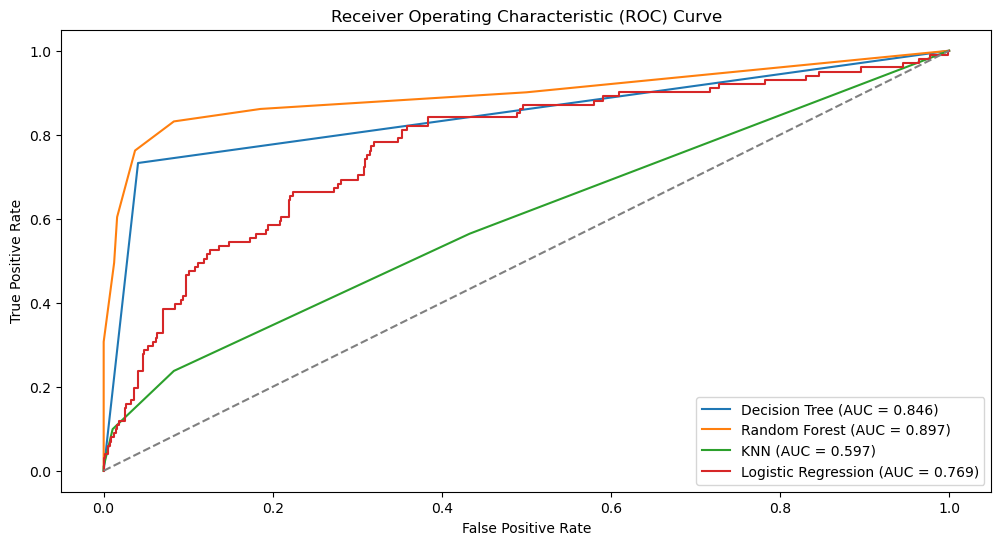

In [ ]:
# Compute the predicted probabilities for each model
tree_probs = tree.predict_proba(X_test)[:, 1]
forest_probs = forest.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
log_probs = lr.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC for each model
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)
tree_auc = roc_auc_score(y_test, tree_probs)

forest_fpr, forest_tpr, _ = roc_curve(y_test, forest_probs)
forest_auc = roc_auc_score(y_test, forest_probs)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
log_auc = roc_auc_score(y_test, log_probs)


# Plot ROC curves
plt.figure(figsize=(12,6))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree (AUC = {:.3f})'.format(tree_auc))
plt.plot(forest_fpr, forest_tpr, label='Random Forest (AUC = {:.3f})'.format(forest_auc))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.3f})'.format(knn_auc))
plt.plot(log_fpr, log_tpr, label='Logistic Regression (AUC = {:.3f})'.format(log_auc))

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')


# Set plot legend
plt.legend()

# Show the plot
plt.show()

In [ ]:

from sklearn.metrics import roc_auc_score

# Compute the AUC scores for each model
tree_auc = roc_auc_score(y_test, tree_probs)
forest_auc = roc_auc_score(y_test, forest_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
log_auc = roc_auc_score(y_test, log_probs)

# Print the AUC scores
print('AUC Scores:')
print(f'Decision Tree: {tree_auc:.3f}')
print(f'Random Forest: {forest_auc:.3f}')
print(f'KNN: {knn_auc:.3f}')
print(f"LogisticRegression: {log_auc:3f}")


AUC Scores:
Decision Tree: 0.846
Random Forest: 0.897
KNN: 0.597
LogisticRegression: 0.768936



# Conclusion 

* ```Random Forest:``` The Random Forest model has the highest AUC score of ```0.897```, indicating better class separation compared to the other models. This suggests that the Random Forest model performs well in distinguishing between the classes.

* ```Decision Tree:``` The Decision Tree model has an AUC score of ```0.846```, which is lower than the Random Forest model but still indicates a good level of class separation. The Decision Tree model performs reasonably well in distinguishing between the classes.

* ```Logistic Regression:``` The Logistic Regression model has an AUC score of ```0.768936```. While it has a lower AUC score compared to the Random Forest and Decision Tree models, it can still provide some level of class separation, although not as strong as the other models.

* ```KNN:``` The KNN model has the lowest AUC score of ```0.597```, indicating relatively weaker class separation compared to the other models. The KNN model may struggle to distinguish between the classes effectively.

Based on the AUC scores alone, the Random Forest model appears to be the best performer among the four models. This would be the best Model for the Telecommunication to use to predict which customer will unsibscribe from their services and take precautionary steps to reduce the chan rate.

# Other Insights 


* The number of days the customer has been with the service provider does not affect the chun rate.

* The total number of minutes the customer used during the day has a negligable relationship between Non-churn and Churn customers.

* The number of customer service calls made by the customer affects the churn rate. WE have high churned subscribers with high customer service calls.

* Most Churn customers are international clients. This might be because of high charges or Tarrifs from the telcom provider.